
# Project: Investigate a Dataset - [Database_No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

### Dataset Description 

we have a csv file contains the data we are going to analyze


### Question(s) for Analysis
1- does Handcap and Diabetes and Hipertension affect the attendence ?

2- what is the percentage of sexes attendence ?

3- does receiving sms affect the attendence ?

4- does neighbourhood affect the attendence ?

5- does age affect the attendence ?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

we will load in the data , check for cleanliness, anc then trim and clean dataset for analysis.

### General Properties


In [4]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# df.duplicated().sum()
df['PatientId'].duplicated().sum()

48228

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


there is no non value in the data

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [8]:
df_a = df[df['Age'] == -1]
df_a

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


drop row of upnormal age

In [9]:
df.drop(index=99832,inplace=True)

In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
df.drop_duplicates(['PatientId','No-show'],inplace=True)

In [12]:
df.drop(['PatientId','AppointmentID','AppointmentDay','ScheduledDay'],axis=1,inplace=True)


drop useless columns.

In [13]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
df.rename(columns={'No-show':'No_show'},inplace=True)

rename the column name to use it

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.




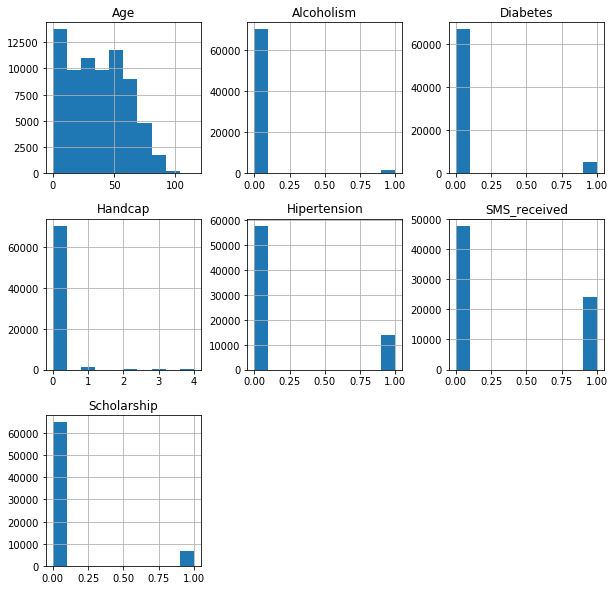

In [15]:
df.hist(figsize=(10,10));

most of them are kids , not alcoholism , not diabetes , not handcap , not hipertension 

#dividing the patients into 2 groups show and not show

In [16]:
show=df.No_show == 'No'
notshow = df.No_show=='Yes'
df[show].count(),df[notshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hipertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hipertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

In [17]:
df[show].mean(),df[notshow].mean()

(Age             37.229166
 Scholarship      0.091334
 Hipertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hipertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

mean age for showed patients 37 , not showed is 34 showed patients recieved sms less than not show patients which means we have to review our sms ways

### Research Question 1 (does Handcap and Diabetes and Hipertension affect on the attendence ?)

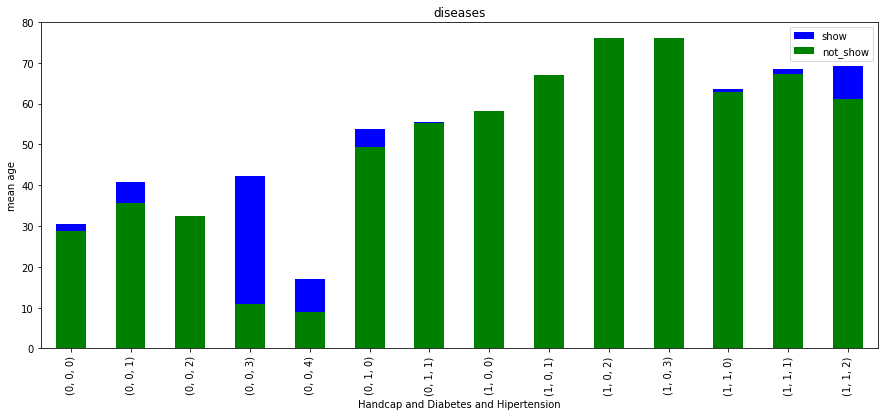

In [39]:
plt.figure(figsize=[15,6])
df[show].groupby(['Hipertension', 'Diabetes','Handcap']).mean()['Age'].plot(kind='bar',color='blue',label='show')
df[notshow].groupby(['Hipertension', 'Diabetes','Handcap']).mean()['Age'].plot(kind='bar',color='green',label='not_show')
plt.legend();
plt.title("diseases")
plt.xlabel('Handcap and Diabetes and Hipertension')
plt.ylabel('mean age');

In [19]:
df[show].groupby(['Hipertension', 'Diabetes','Handcap']).mean()['Age'],df[notshow].groupby(['Hipertension', 'Diabetes','Handcap']).mean()['Age']

(Hipertension  Diabetes  Handcap
 0             0         0          30.605851
                         1          40.829004
                         2          27.178571
                         3          42.200000
                         4          17.000000
               1         0          53.669972
                         1          55.478261
                         2          35.000000
 1             0         0          59.985404
                         1          66.819444
                         2          73.777778
               1         0          63.499014
                         1          68.386076
                         2          69.285714
 Name: Age, dtype: float64, Hipertension  Diabetes  Handcap
 0             0         0          28.702407
                         1          35.673913
                         2          32.384615
                         3          11.000000
                         4           9.000000
               1         0       

mean Diabetes and Hipertension is not effect the attendence but Handcap effect when the patients don't have Diabetes and Hipertension

### Research Question 2  (what is the percentage of sexes attending?)

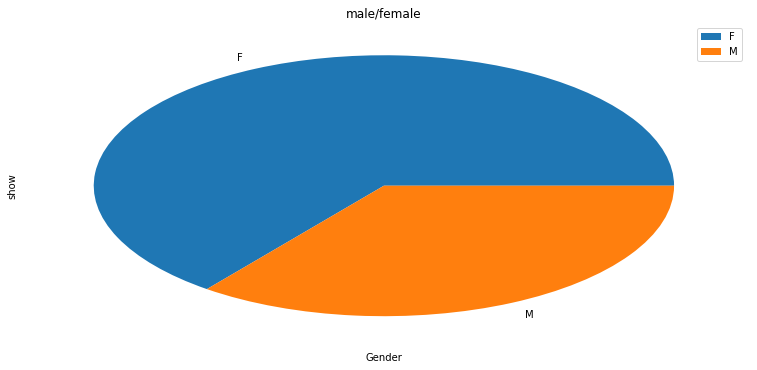

In [37]:
def gend(x):
    plt.figure(figsize=[13,6])
    df['Gender'][x].value_counts(normalize=True).plot(kind='pie',label='show')
    plt.legend();
    plt.title("male/female")
    plt.xlabel('Gender')
    
gend(show)

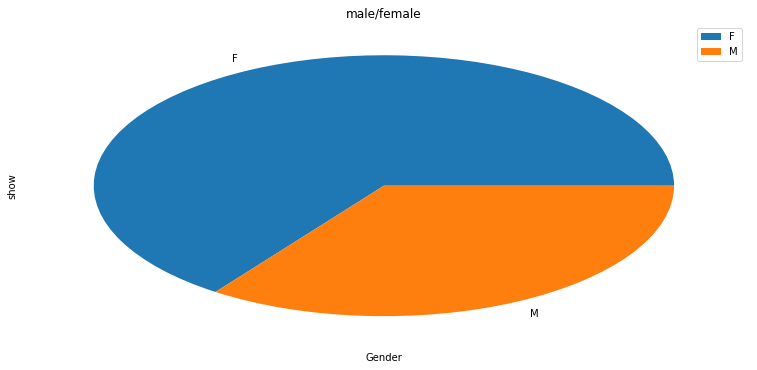

In [38]:
gend(notshow)

gender has not big affect on attendance

In [32]:
def attendance(df,col_N,x,y):
    plt.figure(figsize=[15,6])
    df[col_N][show].hist(alpha=.5,bins=10,color='blue',label='show')
    df[col_N][notshow].hist(alpha=.5,bins=10,color='green',label='not_show')
    plt.legend();
    plt.title("SMS")
    plt.xlabel(col_N)
    plt.ylabel("numbers");
    


### Research Question 3  (does receiving sms affect the attendence?)

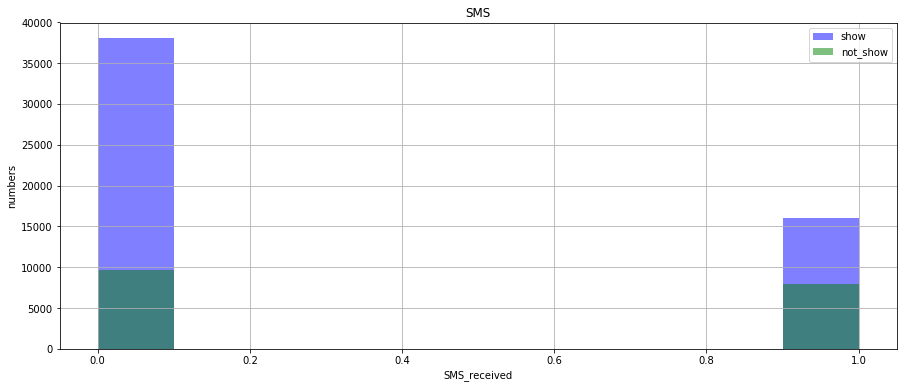

In [36]:
plt.figure(figsize=[15,6])
df['SMS_received'][show].hist(alpha=.5,bins=10,color='blue',label='show')
df['SMS_received'][notshow].hist(alpha=.5,bins=10,color='green',label='not_show')
plt.legend();
plt.title("SMS")
plt.xlabel('SMS_received')
plt.ylabel("numbers");

number of showing patients without receiving sms is greater than showing patients with receiving sms, which means that we need to revisit our sms ways

### Research Question 4 (does neighbourhood affect the attendence?)

This blog of code will not change because it's important and useful

Text(0.5,0,'Neighbourhood')

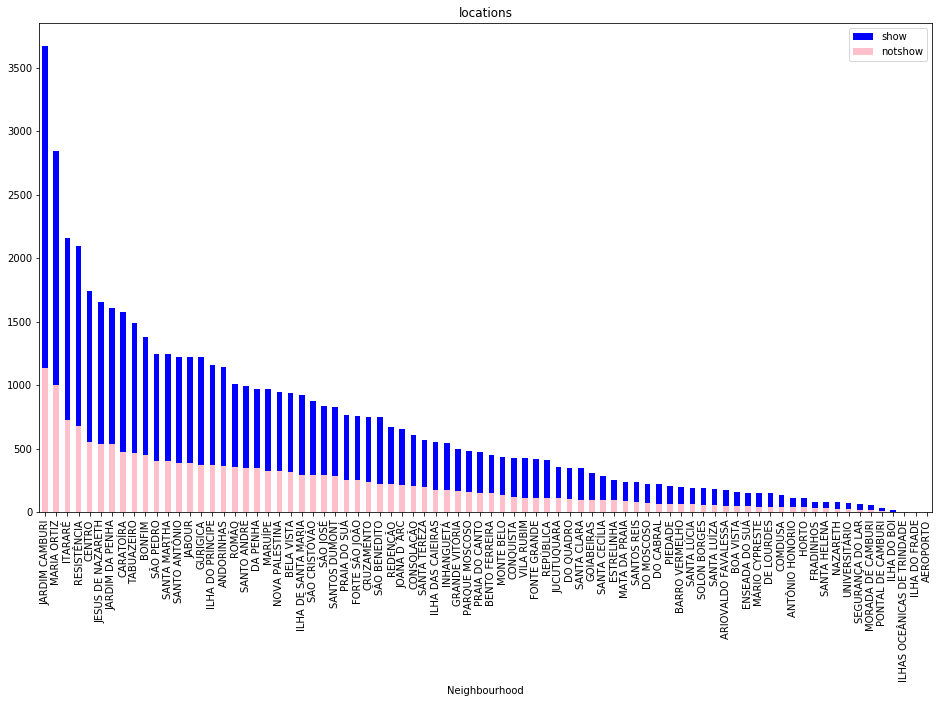

In [24]:
plt.figure(figsize=[16,9])
df.Neighbourhood[show].value_counts().plot(kind='bar',color="blue",label='show')
df.Neighbourhood[notshow].value_counts().plot(kind='bar',color="pink",label='notshow')
plt.legend()
plt.title("locations")
plt.xlabel('Neighbourhood')


### Research Question 4 (does age affect the attendence?)

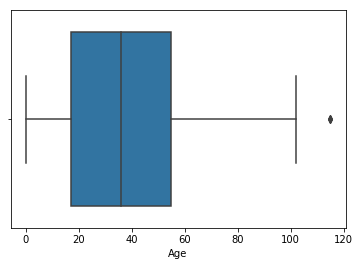

In [25]:
sns.boxplot(x=df["Age"]);

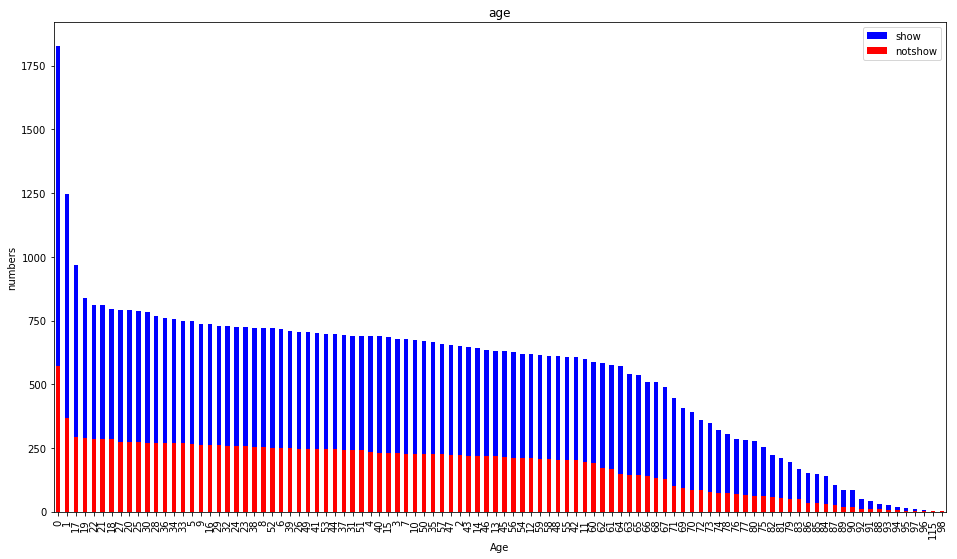

In [31]:
plt.figure(figsize=[16,9])
df.Age[show].value_counts().plot(kind='bar',color="blue",label='show')
df.Age[notshow].value_counts().plot(kind='bar',color="red",label='notshow')
plt.legend()
plt.xlabel('Age')
plt.ylabel("numbers")
plt.title("age");

kids have 0:1 years are the higher attendence 

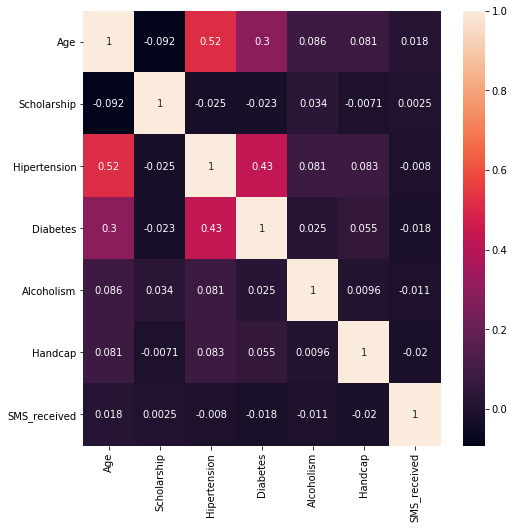

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True);

<a id='conclusions'></a>
## Conclusions

early age attendence is the highest and old 60 to above are The lowest {age affect on the attendence}

jardim camburi are the most attendence and aeroporto and ilmas oceanicas de trindade are The lowest{Neighbourhood affect on the attendence }

number of showing patients without receiving sms is greater than showing patients with receiving sms, which means that we need to revisit our sms ways

gender has not big affect on attendance

mean Diabetes and Hipertension is not effect the attendence but Handcap effect when the patients don't have Diabetes and Hipertension

most of them are kids , not alcoholism , not diabetes , not handcap , not hipertension

## Limitations
no clear correlation between showing and gender,chronic diseases , enrollement in the welfare program.

no nan values in dataset.

There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0